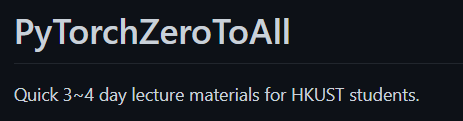

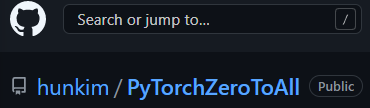

## Code: https://github.com/hunkim/PyTorchZeroToAll
## Slides: http://bit.ly/PyTorchZeroAll
## Videos: http://bit.ly/PyTorchVideo

In [11]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
torch.__version__

'1.12.1+cu113'

## Linear model :
### ŷ = x * w
### loss = (ŷ - y)^2 = (x * w - y)^2

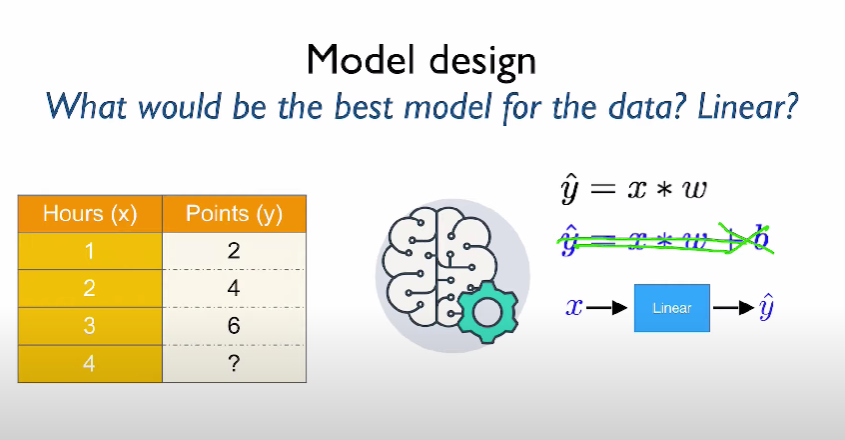

## train loss error (MSE, mean square error)

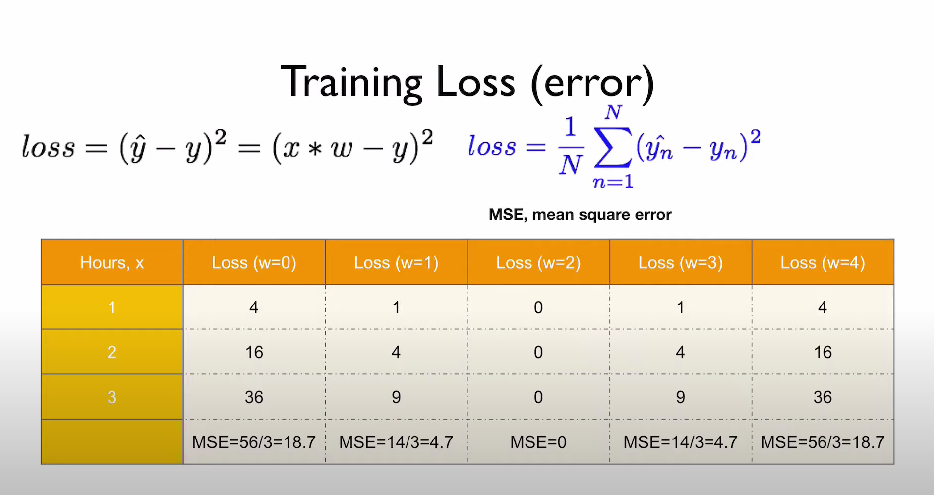

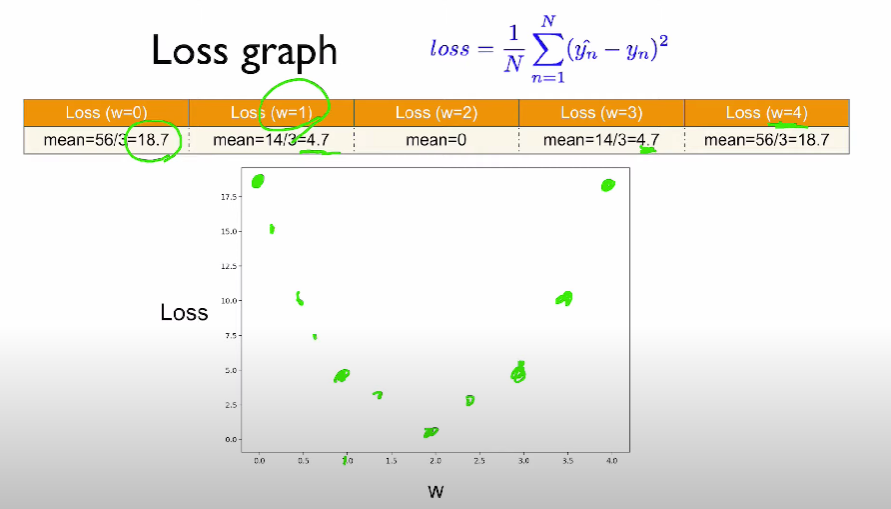

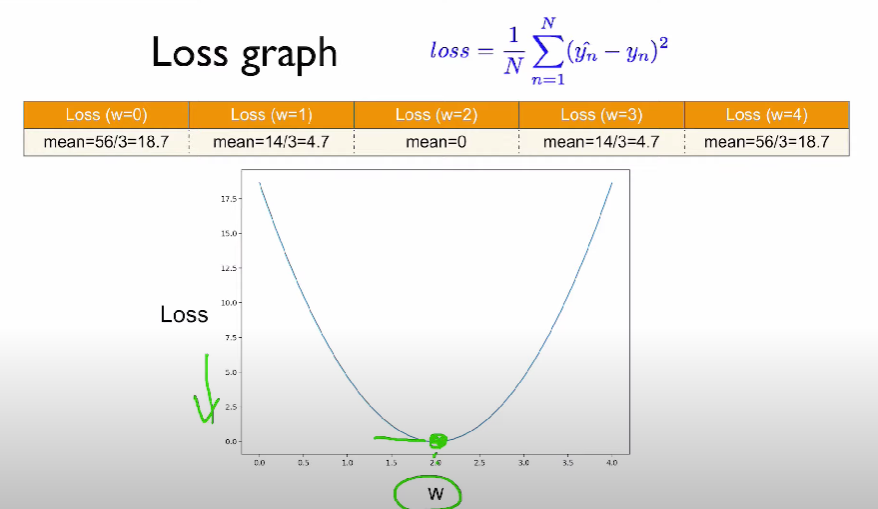

-------------------------------------------------- 
 w =  0.0
1.0 2.0 0.0 4.0
2.0 4.0 0.0 16.0
3.0 6.0 0.0 36.0
MSE = 18.666666666666668 
 
-------------------------------------------------- 
 w =  0.1
1.0 2.0 0.1 3.61
2.0 4.0 0.2 14.44
3.0 6.0 0.30000000000000004 32.49
MSE = 16.846666666666668 
 
-------------------------------------------------- 
 w =  0.2
1.0 2.0 0.2 3.24
2.0 4.0 0.4 12.96
3.0 6.0 0.6000000000000001 29.160000000000004
MSE = 15.120000000000003 
 
-------------------------------------------------- 
 w =  0.30000000000000004
1.0 2.0 0.30000000000000004 2.8899999999999997
2.0 4.0 0.6000000000000001 11.559999999999999
3.0 6.0 0.9000000000000001 26.009999999999998
MSE = 13.486666666666665 
 
-------------------------------------------------- 
 w =  0.4
1.0 2.0 0.4 2.5600000000000005
2.0 4.0 0.8 10.240000000000002
3.0 6.0 1.2000000000000002 23.04
MSE = 11.946666666666667 
 
-------------------------------------------------- 
 w =  0.5
1.0 2.0 0.5 2.25
2.0 4.0 1.0 9.0
3.0 6

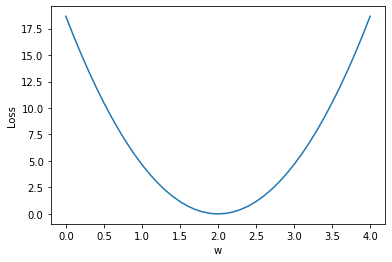

In [13]:
# Model & Loss

# x=input y=正確答案

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# x_data = np.array([1.0, 2.0, 3.0])
# y_data = np.array([2.0, 4.0, 6.0])


# 隨機給w一個值, random guess : random value
w = 1.0 

# model for foward pass, x值通過設定的函式
def forward(x):
  return x * w # ŷ = x * w

# loss funtion, 損失函數
def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * ((y_pred - y))  # loss = (ŷ - y)^2


w_list = []                     
mse_list = []                  # mse容器

for w in np.arange(0.0, 4.1, 0.1):      # learning rate = 0.1
  print("-"*50, "\n", 'w = ',w)       # w值 從0.0 - 4.0, 步伐=lr
  L_sum = 0                  # 初始Loss加總
  for x_val, y_val in zip(x_data,y_data):
    y_pred_val = forward(x_val)       # x值通過forward函式, ŷ = x * w
    L = loss(x_val,y_val)          # 通過loss_funtion, loss = (ŷ - y)^2
    L_sum += L                # Loss加總, Σ(ŷ - y)^2
    print(x_val,y_val,y_pred_val,L)      # [x][y][ŷ][Loss]

  print("MSE =", L_sum / 3, "\n" ,""*50)  # MSE, 1/nΣ(ŷ - y)^2
  w_list.append(w)                # 裝值
  mse_list.append(L_sum / 3)          # 裝值

# 繪圖 Loss 與 w
plt.plot(w_list,mse_list)
plt.ylabel("Loss")
plt.xlabel("w")
plt.show()


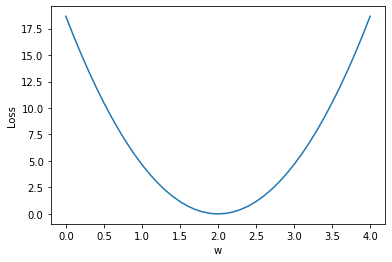

In [14]:
plt.plot(w_list,mse_list)
plt.ylabel("Loss")
plt.xlabel("w")
plt.show()

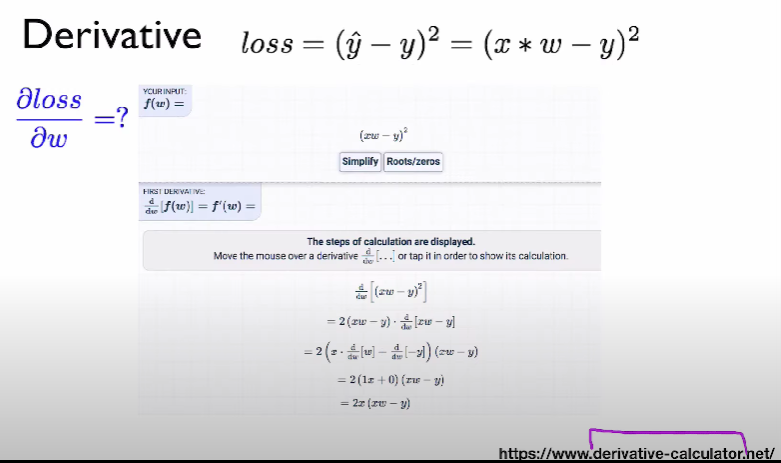

## Gradient descent :
#### Learning rate = η
#### G = ( ∂Loss / ∂w )
#### w = w - η( ∂Loss / ∂w )

#### loss = (ŷ - y)^2 = (x * w - y)^2
#### (d/dw)[(x*w)^2] = 2x(xw -y) 

In [15]:
# Manual Gradient

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

def forward(x):
  return x * w 

# Gradient
def gradient(x,y):
  return 2 * x * (x * w - y) # (d/dw)[(x*w)^2] = 2x(xw -y)

def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * ((y_pred - y))

# Before training
print("Pred (before training)", 4 , forward(4))


Learing_rate = 0.01

# training loop
for epoch in range(100):                # 迭代100次
  for x_val, y_val in zip(x_data,y_data):
    grad = gradient(x_val,y_val)
    w = w - Learing_rate * grad         # w = w - η( ∂Loss / ∂w )
    print("\tgrad: ", x_val, y_val, grad)
    L = loss(x_val,y_val)

  print("progress:", epoch, "w=", w, "loss", L)

# After training
print("Pred (after training)", forward(4))


Pred (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss 4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss 2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss 1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss 0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss 0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss 0.2399802903801062
	grad:  1.0 2.0 -0.3265852213980338
	grad:  2.0 4.0 -1

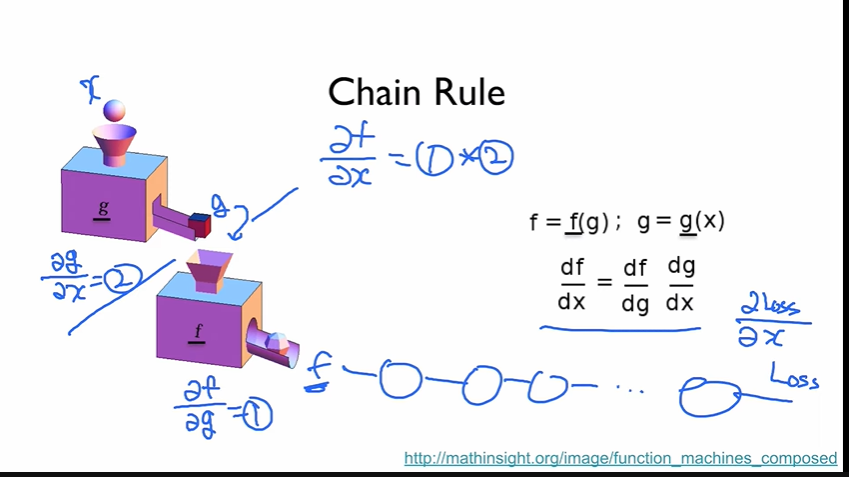

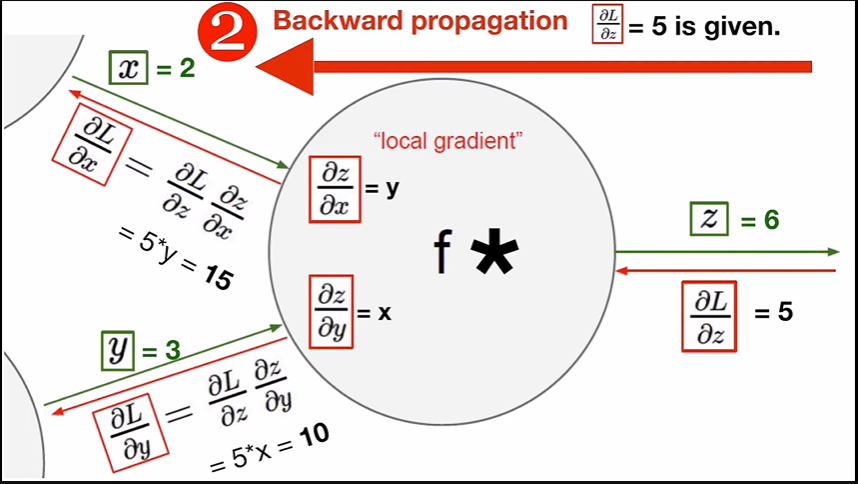

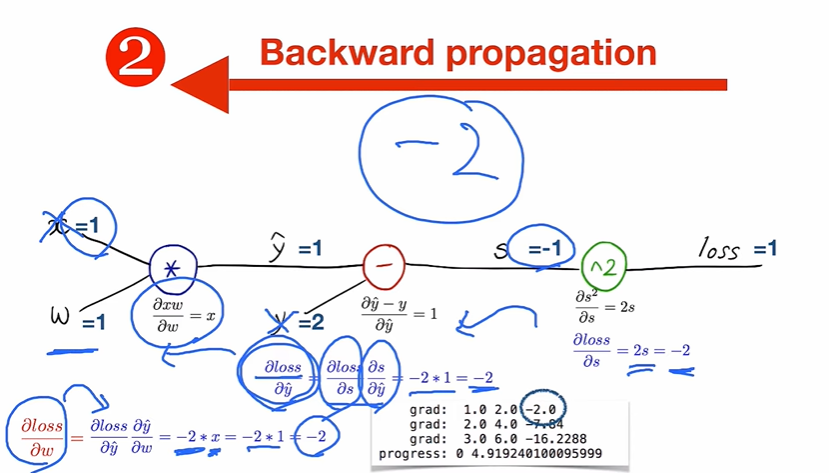

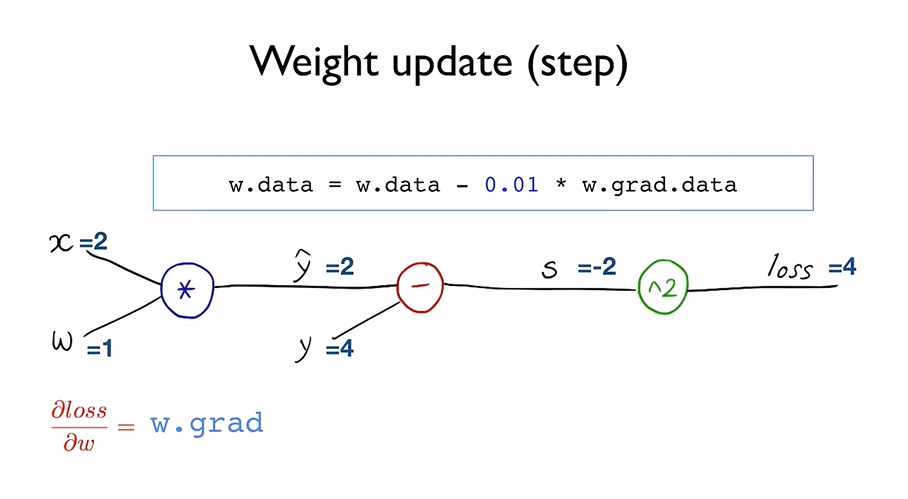

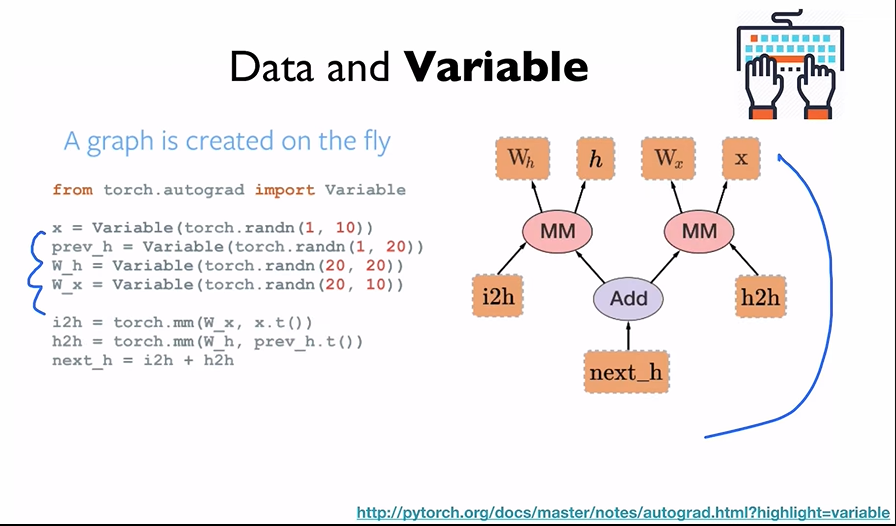

In [16]:
# Auto Grad

import torch
import pdb

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.tensor([1.0], requires_grad=True)

# forward pass 函式
def forward(x):
    return x * w

# Loss function 損失函式
def loss(y_pred, y_val):
    return (y_pred - y_val) ** 2

# Before training
print("Prediction (before training)",  4, forward(4).item())

Learing_rate = 0.01

# Training loop
for epoch in range(10):
    for i,(x_val, y_val) in enumerate(zip(x_data, y_data)):
        y_pred = forward(x_val) # 1) Forward pass
        Loss = loss(y_pred, y_val) # 2) Compute loss

        Loss.backward() # 3) Back propagation to update weights, torch內建backward()更新參數

        print("\tgrad: ", x_val, y_val, w.grad.item())

        print("\t"*6,f"(x{i+1},y{i+1})| Loss = ",Loss)

        w.data = w.data - Learing_rate * w.grad.item() # w微分後的值 w.grad.item

        print("\t"*6,"w微分後的值(dL/dw) =",w.grad.item())

        print("\t"*6,f"w{i+1} = w{i} - lr * dL/dw =",w.data,"w 更新後的參數")

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()

        print("\t"*6,"w.grad.data.zero後的值 =",w.grad.item(),"\n","- "*100)

    print("\t"*1,f"Epoch: {epoch} | Loss: {Loss.item()}","\n","-"*150)

# After training
print("Prediction (after training)",  4, forward(4).item())

Prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
						 (x1,y1)| Loss =  tensor([1.], grad_fn=<PowBackward0>)
						 w微分後的值(dL/dw) = -2.0
						 w1 = w0 - lr * dL/dw = tensor([1.0200]) w 更新後的參數
						 w.grad.data.zero後的值 = 0.0 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
	grad:  2.0 4.0 -7.840000152587891
						 (x2,y2)| Loss =  tensor([3.8416], grad_fn=<PowBackward0>)
						 w微分後的值(dL/dw) = -7.840000152587891
						 w2 = w1 - lr * dL/dw = tensor([1.0984]) w 更新後的參數
						 w.grad.data.zero後的值 = 0.0 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
	grad:  3.0 6.0 -16.228801727294922
						 (x3,y3)| Loss =  tensor([7.3159], grad_fn=<PowBackward0>)
						 w微分後的值(dL/dw) = -16.2

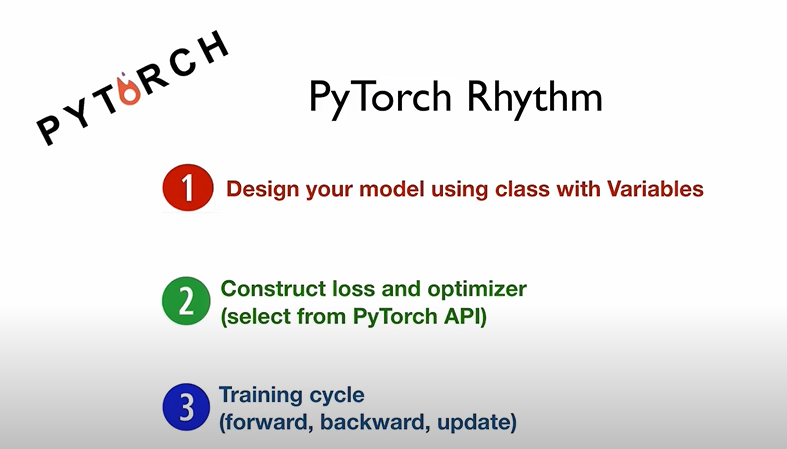

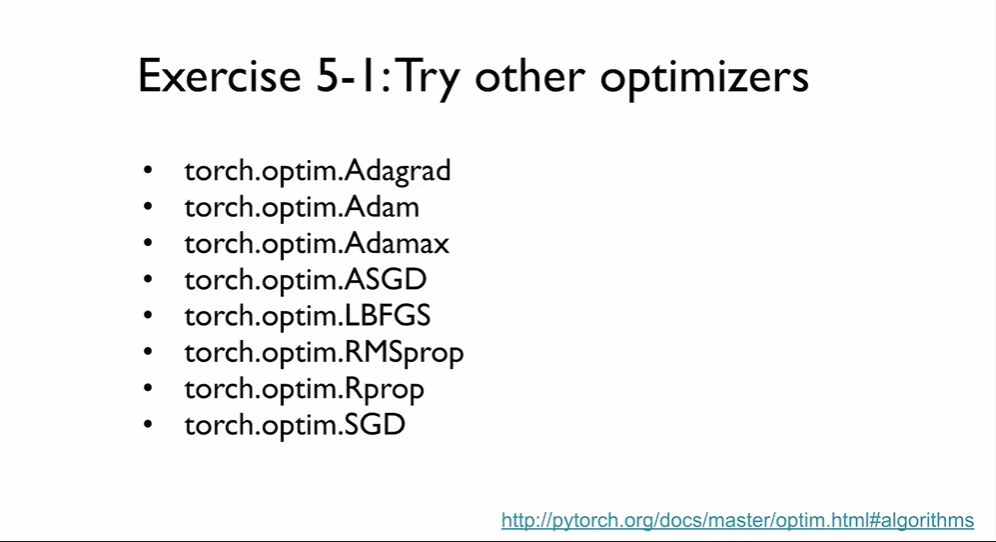

In [17]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])


class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred


# our model
model = Model()


In [18]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
# optimizer = torch.optim.RMSprop(model.parameters())
optimizer = torch.optim.Adam(model.parameters())
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    # 1) Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # 2) Compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)",  4, model(hour_var).data[0][0].item())


Epoch: 0 | Loss: 110.8807144165039 
Epoch: 1 | Loss: 110.76844024658203 
Epoch: 2 | Loss: 110.65624237060547 
Epoch: 3 | Loss: 110.54409790039062 
Epoch: 4 | Loss: 110.43202209472656 
Epoch: 5 | Loss: 110.31999969482422 
Epoch: 6 | Loss: 110.20803833007812 
Epoch: 7 | Loss: 110.09616088867188 
Epoch: 8 | Loss: 109.98432922363281 
Epoch: 9 | Loss: 109.87257385253906 
Epoch: 10 | Loss: 109.76087188720703 
Epoch: 11 | Loss: 109.64925384521484 
Epoch: 12 | Loss: 109.53770446777344 
Epoch: 13 | Loss: 109.42623138427734 
Epoch: 14 | Loss: 109.31480407714844 
Epoch: 15 | Loss: 109.2034683227539 
Epoch: 16 | Loss: 109.09220123291016 
Epoch: 17 | Loss: 108.98100280761719 
Epoch: 18 | Loss: 108.86988830566406 
Epoch: 19 | Loss: 108.75883483886719 
Epoch: 20 | Loss: 108.64785766601562 
Epoch: 21 | Loss: 108.5369644165039 
Epoch: 22 | Loss: 108.42613220214844 
Epoch: 23 | Loss: 108.31539154052734 
Epoch: 24 | Loss: 108.20472717285156 
Epoch: 25 | Loss: 108.09414672851562 
Epoch: 26 | Loss: 107.983

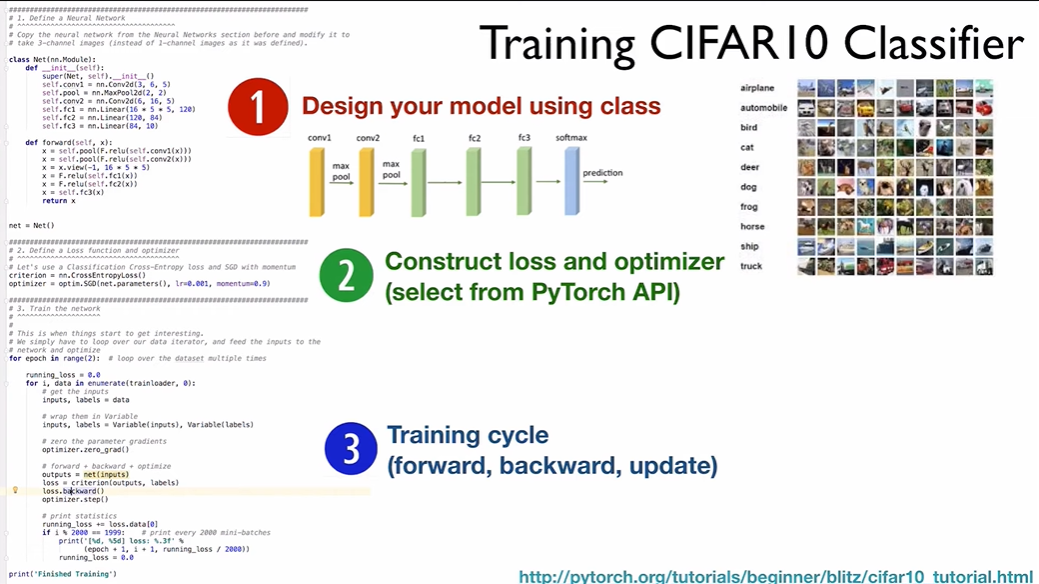

## Logistic Regression

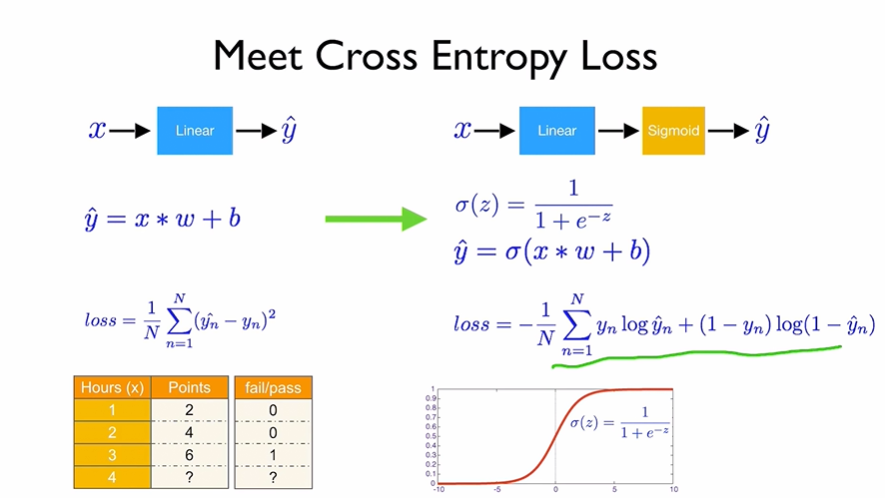

In [20]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

# Training data and ground truth
x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]])


class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.
        """
        y_pred = sigmoid(self.linear(x))
        return y_pred


# our model
model = Model()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
print(f'\nLet\'s predict the hours need to score above 50%\n{"=" * 50}')
hour_var = model(tensor([[1.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')
hour_var = model(tensor([[7.0]]))
print(f'Prediction after 7 hours of training: {hour_var.item():.4f} | Above 50%: { hour_var.item() > 0.5}')


Epoch 1/1000 | Loss: 1.4168
Epoch 2/1000 | Loss: 1.3992
Epoch 3/1000 | Loss: 1.3820
Epoch 4/1000 | Loss: 1.3650
Epoch 5/1000 | Loss: 1.3484
Epoch 6/1000 | Loss: 1.3321
Epoch 7/1000 | Loss: 1.3161
Epoch 8/1000 | Loss: 1.3004
Epoch 9/1000 | Loss: 1.2851
Epoch 10/1000 | Loss: 1.2701
Epoch 11/1000 | Loss: 1.2555
Epoch 12/1000 | Loss: 1.2411
Epoch 13/1000 | Loss: 1.2272
Epoch 14/1000 | Loss: 1.2135
Epoch 15/1000 | Loss: 1.2001
Epoch 16/1000 | Loss: 1.1871
Epoch 17/1000 | Loss: 1.1745
Epoch 18/1000 | Loss: 1.1621
Epoch 19/1000 | Loss: 1.1501
Epoch 20/1000 | Loss: 1.1383
Epoch 21/1000 | Loss: 1.1269
Epoch 22/1000 | Loss: 1.1159
Epoch 23/1000 | Loss: 1.1051
Epoch 24/1000 | Loss: 1.0946
Epoch 25/1000 | Loss: 1.0844
Epoch 26/1000 | Loss: 1.0746
Epoch 27/1000 | Loss: 1.0650
Epoch 28/1000 | Loss: 1.0557
Epoch 29/1000 | Loss: 1.0467
Epoch 30/1000 | Loss: 1.0380
Epoch 31/1000 | Loss: 1.0295
Epoch 32/1000 | Loss: 1.0213
Epoch 33/1000 | Loss: 1.0134
Epoch 34/1000 | Loss: 1.0057
Epoch 35/1000 | Loss: 0